# Summer Analytics 2020 Capstone Project
## Predicting Employee Attrition in the Dawn of Recession
### Debojjal Bagchi
### https://github.com/debojjalb

## 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading the Train Data

In [22]:
train = pd.read_csv('train.csv')
train.shape
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


#### ID & Employee number are not required for training purposes. Hence Dropped.

In [23]:
X_train = train.drop(['Id','EmployeeNumber'], axis =1)

## 3. Feature Engineering

### 3.1 Introducing New Features:

- **Tenure per job**: Usually, people who have worked with many companies but for small periods at every organization tend to leave early as they always need a change of Organization to keep them going.

- **Years without Change**: For any person, a change either in role or job level or responsibility is needed to keep the work exciting to continue. We create a variable to see how many years it has been for an employee without any sort of change using Promotion, Role and Job Change as a metric to cover different variants of change.

- **Compa Ratio**: Compa Ratio is the ratio of the actual pay of an Employee to the midpoint of a salary range. The salary range can be that of his/her department or organization or role. The benchmark numbers can be a organization’s pay or Industry averag.

- **Time_in_each_comp**: Age divided by the number of companies worked.

- **JobSatisf_mean**: The Ratio of Job Satisfaction & Job Involvement.

- **Income_Distance**: The Ratio of Monthly Income & Distance from home.

- **Stability**: Ratio of Years in current role to years in a compamy.

- **Income_YearsComp**: Ratio of Monthly Income to that of number of years in the company.

- **Fidelity**: Ratio of number of companies worked to total working years.


In [24]:
#TenurePerjob
X_train['tenure']  = train['TotalWorkingYears'] / (train['NumCompaniesWorked'] + 1)

#YearWithoutChange
X_train['No_Change_1'] = train['YearsInCurrentRole'] - train['YearsSinceLastPromotion']

#YearWithoutChange
X_train['No_Change_2'] = train['TotalWorkingYears'] - train ['YearsSinceLastPromotion']

In [25]:
#Compa_Ratio

print(X_train.groupby('Department')['MonthlyIncome'].median())
X_train['MonthlyIncome'].median()

Department
Human Resources           2742
Research & Development    3760
Sales                     5405
Name: MonthlyIncome, dtype: int64


4304.0

In [26]:
Med_HR = 2742
Med_Sales = 5405
Med_RnD = 3760
Med_whole = 4304

In [27]:
X_train.shape

(1628, 30)

In [28]:
buckets = [0] * 1628

X_train['CR'] = buckets

X_train['CR_all'] = buckets


In [29]:
#Logic :
#if (X_train['Department'] == 'Sales' ) :
#    X_train['CR_dept']  = TrainSales['MonthlyIncome']/Med_Sales
    
X_train.loc[X_train['Department'] == 'Sales', 'CR'] = X_train['MonthlyIncome']/Med_Sales
X_train.loc[X_train['Department'] == 'Research & Development', 'CR'] = X_train['MonthlyIncome']/Med_RnD
X_train.loc[X_train['Department'] == 'Human Resources', 'CR'] = X_train['MonthlyIncome']/Med_HR
X_train['CR_all']= X_train['MonthlyIncome']/Med_whole



X_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,tenure,No_Change_1,No_Change_2,CR,CR_all
0,30,0,Non-Travel,Research & Development,2,3,Medical,3,Female,3,...,7,6,7,4,1,12.00,1,6,0.681915,0.595725
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,3,Female,3,...,2,1,1,2,1,0.70,1,6,1.240160,1.083411
2,55,1,Travel_Rarely,Sales,2,1,Medical,3,Male,3,...,7,7,3,5,1,2.40,0,5,0.954672,1.198885
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,1,Male,3,...,7,1,7,4,1,2.25,6,17,1.092553,0.954461
4,37,0,Travel_Rarely,Research & Development,3,3,Other,3,Male,3,...,7,7,8,1,1,5.00,0,3,2.509043,2.191914


In [30]:
X_train['Time_in_each_comp'] = (X_train['Age'] - 20) / ((X_train)['NumCompaniesWorked'] + 1)
X_train['JobSatisf_mean'] = (X_train['JobSatisfaction'] + X_train['JobInvolvement']) / 2
X_train['Income_Distance'] = X_train['MonthlyIncome'] / X_train['DistanceFromHome']
X_train['Stability'] = X_train['YearsInCurrentRole'] / X_train['YearsAtCompany']
X_train['Stability'].fillna((X_train['Stability'].mean()), inplace=True)
X_train['Income_YearsComp'] = X_train['MonthlyIncome'] / X_train['YearsAtCompany']
X_train['Income_YearsComp'] = X_train['Income_YearsComp'].replace(np.Inf, 0)
X_train['Fidelity'] = (X_train['NumCompaniesWorked']) / X_train['TotalWorkingYears']
X_train['Fidelity'] = X_train['Fidelity'].replace(np.Inf, 0)


In [31]:
X_train.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
CommunicationSkill           int64
Behaviour                    int64
tenure                     float64
No_Change_1         

### 3.2 BINNING COLUMNS

In [32]:
binners = ['Age', 'DistanceFromHome' , 'CR' , 'CR_all' ,'YearsWithCurrManager' , 'No_Change_1' , 'TotalWorkingYears' ]

In [33]:
#This is just for visualistion!
test_data = pd.read_csv('test.csv')

In [34]:
#Compa_Ratio

print(test_data.groupby('Department')['MonthlyIncome'].median())
test_data['MonthlyIncome'].median()

Department
Human Resources           4280.5
Research & Development    4402.5
Sales                     5740.0
Name: MonthlyIncome, dtype: float64


5038.0

In [35]:

#TenurePerjob
test_data['tenure'] = test_data['TotalWorkingYears'] / (test_data['NumCompaniesWorked'] + 1)

#YearWithoutChange
test_data['No_Change_1'] = test_data['YearsInCurrentRole'] - test_data['YearsSinceLastPromotion']

#YearWithoutChange
test_data['No_Change_2'] = test_data['TotalWorkingYears'] - test_data['YearsSinceLastPromotion']

#CR
Med_HR = 4280.5
Med_RnD = 4402.5
Med_Sales = 5740.0
Med_whole = 5038.0
test_data.loc[test_data['Department'] == 'Sales', 'CR'] = test_data['MonthlyIncome']/Med_Sales
test_data.loc[test_data['Department'] == 'Research & Development', 'CR'] = test_data['MonthlyIncome']/Med_RnD
test_data.loc[test_data['Department'] == 'Human Resources', 'CR'] = test_data['MonthlyIncome']/Med_HR
test_data['CR_all']= test_data['MonthlyIncome']/Med_whole

test_data['Time_in_each_comp'] = (test_data['Age'] - 20) / ((test_data)['NumCompaniesWorked'] + 1)
test_data['JobSatisf_mean'] = (test_data['JobSatisfaction'] + test_data['JobInvolvement']) / 2
test_data['Income_Distance'] = test_data['MonthlyIncome'] / test_data['DistanceFromHome']
test_data['Stability'] = test_data['YearsInCurrentRole'] / test_data['YearsAtCompany']
test_data['Stability'].fillna((test_data['Stability'].mean()), inplace=True)
test_data['Income_YearsComp'] = test_data['MonthlyIncome'] / test_data['YearsAtCompany']
test_data['Income_YearsComp'] = test_data['Income_YearsComp'].replace(np.Inf, 0)
test_data['Fidelity'] = (test_data['NumCompaniesWorked']) / test_data['TotalWorkingYears']
test_data['Fidelity'] = test_data['Fidelity'].replace(np.Inf, 0)


test_data[binners].describe()

,Age,DistanceFromHome,CR,CR_all,YearsWithCurrManager,No_Change_1,TotalWorkingYears
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,37.010638,9.293617,1.389059,1.307041,4.261702,1.974468,11.387234
std,9.166425,8.084506,1.042545,0.944519,3.501693,3.221627,7.817961
min,18.000000,1.000000,0.190070,0.216554,0.000000,-9.000000,0.000000
25%,31.000000,2.000000,0.668404,0.588478,2.000000,0.000000,6.000000
50%,35.000000,7.000000,1.000000,1.000000,3.000000,1.500000,10.000000
75%,43.000000,15.000000,1.566202,1.659835,7.000000,4.000000,15.000000
max,60.000000,29.000000,4.606238,3.958515,17.000000,15.000000,40.000000


In [36]:
X_train[binners].describe()

,Age,DistanceFromHome,CR,CR_all,YearsWithCurrManager,No_Change_1,TotalWorkingYears
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,35.645577,9.735258,1.383345,1.344220,3.551597,1.565725,9.949017
std,9.481794,8.306546,1.104400,1.008200,3.494369,3.088728,7.482936
min,18.000000,1.000000,0.194635,0.234433,0.000000,-10.000000,0.000000
25%,29.000000,2.000000,0.668883,0.609898,0.000000,0.000000,5.000000
50%,34.000000,8.000000,1.000000,1.000000,2.000000,1.000000,8.000000
75%,42.000000,15.000000,1.677983,1.655263,7.000000,3.000000,13.000000
max,60.000000,29.000000,7.169220,4.646608,17.000000,16.000000,38.000000


#### BINNING

- AgeGroup = 15 to 60 years with groups of 5 Years
- DistanceGroup = 15 to 30 units with groups of 5 unis
- CR  OverallGroup = CR less than 0.5, CR greater then 0.5
- CR Dept. Group = CR less than 0.5, CR greater then 0.5
- Years with Curr Manager Group = 0 to 20 years with groups of 5 Years
- Change 1 Group = Less then 2.5, Greater than 2.5
- TotalWorkingYearsGrp = 5 to 45 years with groups of 5 Years
- Change 2 Group

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,Stability,Income_YearsComp,Fidelity,AgeGroup,DistanceGroup,CompaOverallGroup,CRGroup,YearContGroup,No_Change_1grp,TotalWorkingYearsGrp
0,30,0,Non-Travel,Research & Development,2,3,Medical,3,Female,3,...,0.636364,233.090909,0.000000,1,0,1,1,1,0,3
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,3,Female,3,...,0.666667,1554.333333,1.285714,1,1,1,1,0,0,2
2,55,1,Travel_Rarely,Sales,2,1,Medical,3,Male,3,...,0.777778,573.333333,0.333333,3,0,1,1,0,0,3
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,1,Male,3,...,1.000000,586.857143,0.388889,2,3,1,1,1,1,4
4,37,0,Travel_Rarely,Research & Development,3,3,Other,3,Male,3,...,0.700000,943.400000,0.100000,1,0,1,1,1,0,2


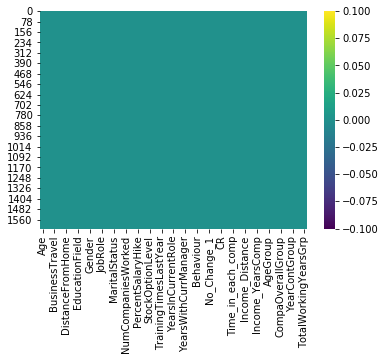

In [37]:
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=np.linspace(15, 60, 5), labels= False)
X_train['DistanceGroup'] = pd.cut(X_train['DistanceFromHome'], bins=np.linspace(0, 30, 5), labels= False)
X_train['CompaOverallGroup'] = pd.cut(X_train['CR_all'], bins= [-100, 0.5, 100], labels= False)
X_train['CRGroup'] = pd.cut(X_train['CR'], bins= [-100, 0.5, 100], labels= False)
X_train['YearContGroup'] = pd.cut(X_train['YearsWithCurrManager'], bins= [-1, 5, 10, 15, 20], labels= False)
X_train['No_Change_1grp'] = pd.cut(X_train['No_Change_1'], bins= [-100, 2.5, 100], labels= False)
X_train['TotalWorkingYearsGrp'] = pd.cut(X_train['TotalWorkingYears'], bins= [-100,0,5,10,15,20,25,30,35,40,45,50], labels= False)


sns.heatmap(X_train.isnull(),False,False,'viridis')

X_train.head()

## 4. CORRELATION MATRIX

In [38]:
X_train = X_train.drop (binners , axis = 1)

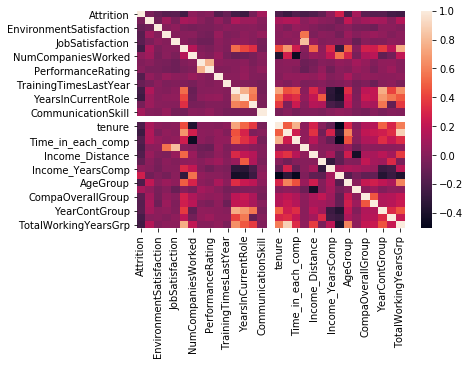

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt
X_train.corr()
corrMatrix = X_train.corr()
sn.heatmap(corrMatrix)
plt.show()

### 4.1 Find High Correlation

- Between Years at Company, Years in Curr Role, Years with Curr Manager & Years Since Last Promotion - We will consider ‘Years with Curr Manager’

- Between Job Level & Monthly Income - We will consider ‘Job Level’

- Betweem Percent Salary Hike & Performance Ratiing - We shall consider ’Percent Salary Hike

In [40]:
X_train.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'CommunicationSkill', 'Behaviour', 'tenure', 'No_Change_2',
       'Time_in_each_comp', 'JobSatisf_mean', 'Income_Distance', 'Stability',
       'Income_YearsComp', 'Fidelity', 'AgeGroup', 'DistanceGroup',
       'CompaOverallGroup', 'CRGroup', 'YearContGroup', 'No_Change_1grp',
       'TotalWorkingYearsGrp'],
      dtype='object')

### 4.2 Drop highly related Columns

In [41]:
X_train_copy = X_train
X_train = X_train.drop(['YearsInCurrentRole','YearsSinceLastPromotion','YearsAtCompany' , 'PerformanceRating'], axis =1)
X_train.shape

(1628, 34)

In [42]:
train_corr = X_train

### 4.3 Drop Empty Columns 

In [43]:
X_train = train_corr.drop(['Attrition','Behaviour', 'tenure'], axis =1)
y_train = train_corr['Attrition']
X_train.shape

(1628, 31)

In [44]:
X_train.dtypes

BusinessTravel              object
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
CommunicationSkill           int64
No_Change_2                  int64
Time_in_each_comp          float64
JobSatisf_mean             float64
Income_Distance            float64
Stability                  float64
Income_YearsComp           float64
Fidelity                   float64
AgeGroup                     int64
DistanceGroup                int64
CompaOverallGroup            int64
CRGroup                      int64
YearContGroup       

## 5. Handling Skewed Data

In [45]:
X_train_cols =X_train.columns
X_train.shape

(1628, 31)

In [143]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [47]:
X_train.describe()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,CommunicationSkill,No_Change_2,Time_in_each_comp,JobSatisf_mean,Income_Distance,Stability,Income_YearsComp,Fidelity,AgeGroup,DistanceGroup,CompaOverallGroup,CRGroup,YearContGroup,No_Change_1grp,TotalWorkingYearsGrp
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,2.884521,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,0.692260,2.752457,3.135749,7.899877,5.652035,2.644963,1649.409438,0.570940,1561.071353,0.419111,1.324939,0.877764,0.914005,0.919533,0.336609,0.285627,2.396806
std,1.020470,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.864808,1.288033,1.408770,6.874173,4.861544,0.658633,2579.441230,0.340795,2027.083746,0.465011,0.901787,1.049680,0.280443,0.272098,0.560719,0.451851,1.478314
min,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,1.000000,46.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,0.000000,2.000000,2.000000,3.000000,2.500000,2.000000,291.071429,0.333333,573.333333,0.100000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,0.000000,3.000000,3.000000,6.000000,4.500000,2.500000,665.750000,0.666667,978.071429,0.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,4.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,1.000000,3.000000,4.000000,10.000000,7.500000,3.000000,1742.500000,0.833333,1917.968750,0.587500,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,3.000000,6.000000,5.000000,37.000000,40.000000,4.000000,19999.000000,1.000000,19613.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,8.000000


### 5.1 Skewness involved in
- MonthlyIncome
- No_Change_2
- Time_in_each_comp
- Income_YearsComp
- Fidelity
- TotalWorkingYearsGrp

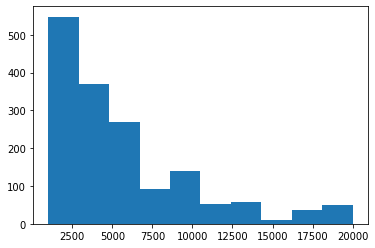

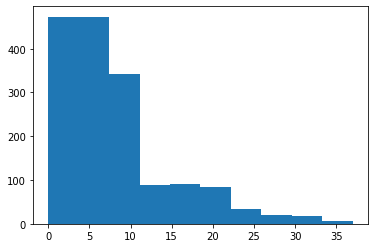

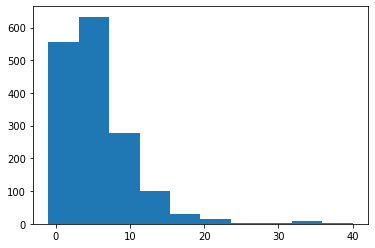

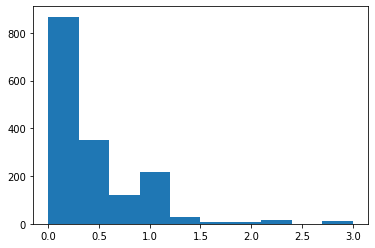

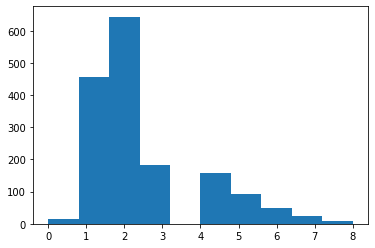

In [48]:
plt.hist(X_train['MonthlyIncome']);
plt.show()
plt.hist(X_train['No_Change_2']);
plt.show()
plt.hist(X_train['Time_in_each_comp']);
plt.show()
#plt.hist(X_train['Income_YearsComp']);
#plt.show()
plt.hist(X_train['Fidelity']);
plt.show()
plt.hist(X_train['TotalWorkingYearsGrp']);
plt.show()

### 5.2 Apply Squareroot Transform to fix skewness

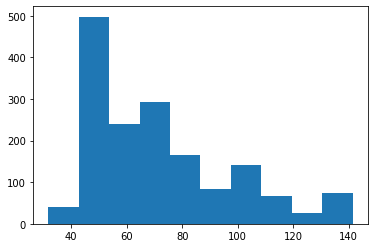

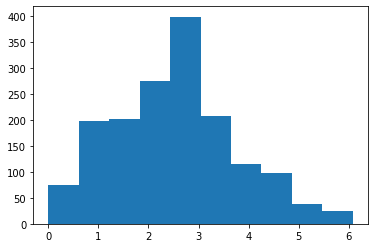

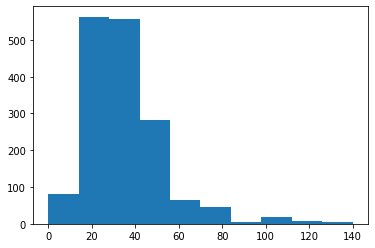

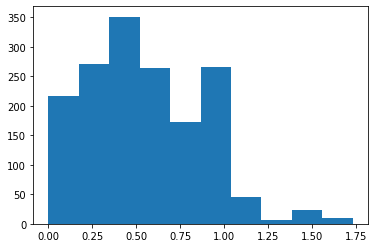

In [49]:
plt.hist(np.sqrt(X_train['MonthlyIncome']));
plt.show()
plt.hist(np.sqrt(X_train['No_Change_2']));
plt.show()
#plt.hist(np.sqrt(X_train['Time_in_each_comp']));
#plt.show()
plt.hist(np.sqrt(X_train['Income_YearsComp']));
plt.show()
plt.hist(np.sqrt(X_train['Fidelity']));
plt.show()


In [50]:
X_train['MonthlyIncome'] = (np.sqrt(X_train['MonthlyIncome']))
X_train['No_Change_2'] = (np.sqrt(X_train['No_Change_2']))
#X_train['Time_in_each_comp'] = (np.sqrt(X_train['Time_in_each_comp']))
X_train['Income_YearsComp'] = (np.sqrt(X_train['Income_YearsComp']))
X_train['Fidelity'] = (np.sqrt(X_train['Fidelity']))

## 6. Handling Categorical Data

### 6.1 One Hot Encoding Categorical Data

In [51]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

In [52]:
from sklearn.compose import make_column_transformer
columns_trans= make_column_transformer((onehotencoder, ['BusinessTravel','Department' ,'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime']), remainder = 'passthrough' )

In [53]:
X_train_pp = columns_trans.fit_transform(X_train)
X_train_pp.shape

(1628, 52)

## 7. Loading the Test Data

In [54]:
test = pd.read_csv('test.csv')
test.shape

(470, 28)

## 8. Apply Same Preprocessing steps as in Train Data to prevent Data Leakage

In [55]:
#TenurePerjob
test['tenure'] = test['TotalWorkingYears'] / (test['NumCompaniesWorked'] + 1)

#YearWithoutChange
test['No_Change_1'] = test['YearsInCurrentRole'] - test['YearsSinceLastPromotion']

#YearWithoutChange
test['No_Change_2'] = test['TotalWorkingYears'] - test['YearsSinceLastPromotion']

In [56]:
#Compa_Ratio

print(test.groupby('Department')['MonthlyIncome'].median())
test['MonthlyIncome'].median()

Department
Human Resources           4280.5
Research & Development    4402.5
Sales                     5740.0
Name: MonthlyIncome, dtype: float64


5038.0

In [57]:
Med_HR = 4280.5
Med_RnD = 4402.5
Med_Sales = 5740.0
Med_whole = 5038.0


In [58]:
buckets = [0] * 470
test['CR'] = buckets


In [59]:
test.loc[test['Department'] == 'Sales', 'CR'] = test['MonthlyIncome']/Med_Sales
test.loc[test['Department'] == 'Research & Development', 'CR'] = test['MonthlyIncome']/Med_RnD
test.loc[test['Department'] == 'Human Resources', 'CR'] = test['MonthlyIncome']/Med_HR
test['CR_all']= test['MonthlyIncome']/Med_whole


test.tail()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,tenure,No_Change_1,No_Change_2,CR,CR_all
465,466,32,Travel_Rarely,Research & Development,2,4,Life Sciences,1692,4,Male,3,Laboratory Technician,2,Single,1393,1,No,12,3,0,1,2,1,0,0,0,5,1,0.5,0,1,0.316411,0.276499
466,467,18,Travel_Frequently,Sales,3,2,Medical,1624,2,Female,3,Sales Representative,4,Single,1569,1,Yes,12,3,0,0,2,0,0,0,0,2,1,0.0,0,0,0.273345,0.311433
467,468,24,Travel_Rarely,Research & Development,23,3,Medical,639,2,Male,4,Research Scientist,4,Married,2725,1,Yes,11,3,2,6,3,6,5,1,4,1,1,3.0,4,5,0.618966,0.540889
468,469,31,Travel_Rarely,Research & Development,23,3,Medical,367,2,Male,2,Healthcare Representative,4,Married,5582,0,No,21,4,1,10,2,9,0,7,8,3,1,10.0,-7,3,1.267916,1.107979
469,470,36,Travel_Rarely,Research & Development,5,4,Life Sciences,1651,2,Female,3,Healthcare Representative,1,Married,8008,4,No,12,3,2,9,6,3,2,0,2,5,1,1.8,2,9,1.818966,1.589520


,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,tenure,No_Change_1,No_Change_2,CR,CR_all,AgeGroup,DistanceGroup,CompaOverallGroup,CRGroup,YearContGroup,No_Change_1grp,TotalWorkingYearsGrp
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1,2.5,2,5,0.470187,0.410877,1,1,0,0,0,0,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1,2.6,2,8,0.951220,1.083763,1,0,1,1,1,0,3
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1,2.6,1,7,1.356956,1.185788,1,0,1,1,1,0,3
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1,0.8,3,8,1.376945,1.203255,2,0,1,1,0,1,2
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1,4.5,7,9,1.010108,0.882692,2,0,1,1,1,1,2


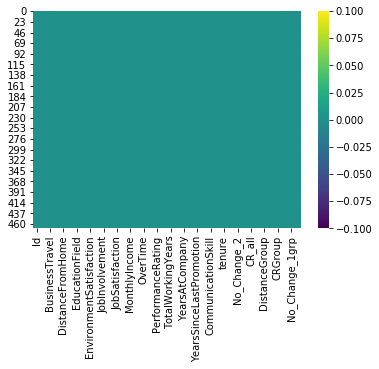

In [60]:
test['AgeGroup'] = pd.cut(test['Age'], bins=np.linspace(15, 60, 5), labels= False)
test['DistanceGroup'] = pd.cut(test['DistanceFromHome'], bins=np.linspace(0, 30, 5), labels= False)
test['CompaOverallGroup'] = pd.cut(test['CR_all'], bins= [-100, 0.5, 100], labels= False)
test['CRGroup'] = pd.cut(test['CR'], bins= [-100, 0.5, 100], labels= False)
test['YearContGroup'] = pd.cut(test['YearsWithCurrManager'], bins= [-1, 5, 10, 15, 20], labels= False)
test['No_Change_1grp'] = pd.cut(test['No_Change_1'], bins= [-100, 2.5, 100], labels= False)
test['TotalWorkingYearsGrp'] = pd.cut(test['TotalWorkingYears'], bins= [-100,0,5,10,15,20,25,30,35,40,45,50], labels= False)


sns.heatmap(test.isnull(),False,False,'viridis')

test.head()

In [61]:
test['Time_in_each_comp'] = (test['Age'] - 20) / ((test)['NumCompaniesWorked'] + 1)
test['JobSatisf_mean'] = (test['JobSatisfaction'] + test['JobInvolvement']) / 2
test['Income_Distance'] = test['MonthlyIncome'] / test['DistanceFromHome']
test['Stability'] = test['YearsInCurrentRole'] / test['YearsAtCompany']
test['Stability'].fillna((test['Stability'].mean()), inplace=True)
test['Income_YearsComp'] = test['MonthlyIncome'] / test['YearsAtCompany']
test['Income_YearsComp'] = test['Income_YearsComp'].replace(np.Inf, 0)
test['Fidelity'] = (test['NumCompaniesWorked']) / test['TotalWorkingYears']
test['Fidelity'] = test['Fidelity'].replace(np.Inf, 0)


In [62]:
test['MonthlyIncome'] = np.sqrt(test['MonthlyIncome'])
test['No_Change_2'] = np.sqrt(test['No_Change_2'])
#test['Time_in_each_comp'] = np.sqrt(test['Time_in_each_comp'])
test['Income_YearsComp'] = np.sqrt(test['Income_YearsComp'])
test['Fidelity'] = np.sqrt(test['Fidelity'])

In [63]:
test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,tenure,No_Change_1,No_Change_2,CR,CR_all,AgeGroup,DistanceGroup,CompaOverallGroup,CRGroup,YearContGroup,No_Change_1grp,TotalWorkingYearsGrp,Time_in_each_comp,JobSatisf_mean,Income_Distance,Stability,Income_YearsComp,Fidelity
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,45.497253,1,No,23,4,1,5,3,5,2,0,4,5,1,2.5,2,2.236068,0.470187,0.410877,1,1,0,0,0,0,1,4.0,3.5,230.000000,0.400000,20.346990,0.447214
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,73.891813,4,No,22,4,2,13,4,7,7,5,7,3,1,2.6,2,2.828427,0.951220,1.083763,1,0,1,1,1,0,3,2.2,4.0,910.000000,1.000000,27.928480,0.554700
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,77.291655,4,Yes,13,3,2,13,2,7,7,6,7,4,1,2.6,1,2.645751,1.356956,1.185788,1,0,1,1,1,0,3,3.4,2.5,995.666667,1.000000,29.213500,0.554700
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,77.858847,9,Yes,13,3,1,8,4,4,3,0,2,5,1,0.8,3,2.828427,1.376945,1.203255,2,0,1,1,0,1,2,2.2,3.0,6062.000000,0.750000,38.929423,1.060660
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,66.685831,1,No,12,3,0,9,5,9,7,0,8,2,1,4.5,7,3.000000,1.010108,0.882692,2,0,1,1,1,1,2,12.5,2.5,1111.750000,0.777778,22.228610,0.333333


In [64]:
X_test = test[X_train_cols]
X_test.shape

(470, 31)

In [65]:
X_test_pp = columns_trans.transform(X_test)


## 9. Do a final Check on the shape of Train & Test Data. As this is the end of preprocessing

In [66]:
print(X_train_pp.shape)
print(y_train.shape)
print(X_test_pp.shape)

(1628, 52)
(1628,)
(470, 52)


## 10. Import The XGB Classifer from Sklearn Library

In [71]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from datetime import datetime


## 11. Use Grid Search to find the hyperparameters

In [138]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, random_state=42)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_pp, y_train)
timer(start_time) # timing ends here for "start_time" variable


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 54.4min finished



 Time taken: 0 hours 54 minutes and 25.23 seconds.


In [139]:
print('\n All results:')
#print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-02.csv', index=False)


 All results:

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.001,
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9994636406934299

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.001, 'colsample_bytree': 0.6}


## 12. Fit the model with the XGB Classifier with Best Hyperparameters

In [94]:
# xgb 
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.01,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing= None ,
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1)


xgb_clf.fit(X_train_pp, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.01,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=None, n_estimators=750,
              n_jobs=-1, nthread=None, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [95]:
xgb_clf.score(X_train_pp, y_train)

1.0

## 13. Get the Predicted Probabilities of Attrition with XGB Classifier (Kaggle Submission #1)

In [96]:
y_pred = xgb_clf.predict_proba(X_test_pp )

In [97]:
df = pd.DataFrame(y_pred, columns =['Delete', 'Attrition'])  

df.insert(0, 'Id', test['Id'])
df=df.drop(['Delete'], axis = 1)
print(df)



      Id  Attrition
0      1   0.002298
1      2   0.030858
2      3   0.005094
3      4   0.032337
4      5   0.003861
..   ...        ...
465  466   0.085795
466  467   0.920488
467  468   0.663670
468  469   0.013050
469  470   0.002916

[470 rows x 2 columns]


In [141]:
df.to_csv('XGB_FINAL_SUBMISSION', index = False)

## 14. Fit the model with the Light GBM Classifier with goss boosting

In [181]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()


In [182]:
# lgb 
clf = lgb.LGBMClassifier() 


In [183]:
categorical_feats = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel']

In [184]:
for c in categorical_feats:
    X_train[c] = X_train[c].astype('category')
for c in categorical_feats:
    X_test[c] = X_test[c].astype('category')

/Users/debojjalbagchi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [185]:
lgb_train = lgb.Dataset(X_train, y_train , categorical_feature = categorical_feats)

In [186]:
gbm = clf.fit(X_train, y_train , categorical_feature=categorical_feats)

## 15. Get the Predicted Probabilities of Attrition using Light GBM Classifier (Kaggle Submission #2)

In [187]:
y_pred = clf.predict_proba(X_test)

In [188]:
df = pd.DataFrame(y_pred, columns =['Delete', 'Attrition'])  

df.insert(0, 'Id', test['Id'])
df=df.drop(['Delete'], axis = 1)
print(df)



      Id  Attrition
0      1   0.005776
1      2   0.002193
2      3   0.005664
3      4   0.011200
4      5   0.000900
..   ...        ...
465  466   0.268247
466  467   0.993305
467  468   0.020418
468  469   0.026015
469  470   0.001971

[470 rows x 2 columns]


In [189]:
df.to_csv('LGBM_FINAL_SUBMISSION', index = False)

## 16. Compare the models (Validation)

In [194]:
import sklearn.model_selection
X_train_val, X_test_val, y_train_val, y_test_val = sklearn.model_selection.train_test_split(X_train_pp, y_train, train_size=0.8,test_size=0.2, random_state=43)
X_train_val_lgb, X_test_val_lgb, y_train_val_lgb, y_test_val_lgb = sklearn.model_selection.train_test_split(X_train, y_train, train_size=0.8,test_size=0.2, random_state=43)


In [195]:
xgb_clf.fit(X_train_val, y_train_val)
clf.fit(X_train_val_lgb, y_train_val_lgb)
y_pred_xgb_val = xgb_clf.predict(X_test_val )
y_pred_lgbm_val = clf.predict(X_test_val_lgb )

In [196]:
sklearn.metrics.accuracy_score

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

In [197]:
print('XGB Classifier')
print('\n')

print('ACCURACY:')

print(sklearn.metrics.accuracy_score(y_test_val, y_pred_xgb_val))
print('\n')
print('AUC:')

print(sklearn.metrics.roc_auc_score(y_test_val, y_pred_xgb_val))
print('\n')

print('Classification Report:')

print(sklearn.metrics.classification_report(y_test_val, y_pred_xgb_val))

XGB Classifier


ACCURACY:
0.950920245398773


AUC:
0.9555555555555555


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       180
           1       0.90      1.00      0.95       146

    accuracy                           0.95       326
   macro avg       0.95      0.96      0.95       326
weighted avg       0.96      0.95      0.95       326



In [199]:
print('Light GBM Classifier')
print('\n')


print('ACCURACY')

print(sklearn.metrics.accuracy_score(y_test_val_lgb, y_pred_lgbm_val))
print('\n')

print('AUC')

print(sklearn.metrics.roc_auc_score(y_test_val_lgb, y_pred_lgbm_val))
print('\n')

print('Classification Report:')

print(sklearn.metrics.classification_report(y_test_val_lgb, y_pred_lgbm_val))

Light GBM Classifier


ACCURACY
0.9601226993865031


AUC
0.9638888888888889


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       180
           1       0.92      1.00      0.96       146

    accuracy                           0.96       326
   macro avg       0.96      0.96      0.96       326
weighted avg       0.96      0.96      0.96       326

